# AML Classifier Data Augmentation

![Acute Myeloid Leukemia Research Python Classifier](../Media/Images/Banner-Social.jpg)

The AML Classifier Data Augmentation program applies filters to the original dataset and increases the amount of training / test data. The AML Classifier Data Augmentation program is part of the computer vision research and development for the Peter Moss Acute Myeloid Leukemia Research Project. 

# Research papers followed

The papers that this part of the project is based on were provided by project team member, Ho Leung, Associate Professor of Biochemistry & Molecular Biophysics at Kansas State University. 

## Leukemia Blood Cell Image Classification Using Convolutional Neural Network
T. T. P. Thanh, Caleb Vununu, Sukhrob Atoev, Suk-Hwan Lee, and Ki-Ryong Kwon 
http://www.ijcte.org/vol10/1198-H0012.pdf


# Dataset  

The [Acute Lymphoblastic Leukemia Image Database for Image Processing](https://homes.di.unimi.it/scotti/all/) dataset is used for this project. The dataset was created by [Fabio Scotti, Associate Professor Dipartimento di Informatica, Università degli Studi di Milano](https://homes.di.unimi.it/scotti/). Big thanks to Fabio for his research and time put in to creating the dataset and documentation, it is one of his personal projects. You will need to follow the steps outlined [here](https://homes.di.unimi.it/scotti/all/#download) to gain access to the dataset.

## Data augmentation

[Acute Myeloid Leukemia Research Python Classifier](Media/Images/slides.png)

I decided to use some augmentation proposals outlined in Leukemia Blood Cell Image Classification Using Convolutional Neural Network by T. T. P. Thanh, Caleb Vununu, Sukhrob Atoev, Suk-Hwan Lee, and Ki-Ryong Kwon. The augmentations I chose were grayscaling, histogram equalization, horizontal and vertical reflection and gaussian blur to start with. Using these techniques so far I have been able to increase a dataset from 49 positive and 49 negative images to 270 positive and 270 negative, with more augmentations to experiment with. 

The full Python class that holds the functions mentioned below can be found in [Classes/Data.py](Classes/Data.py), The Data class is a wrapper class around releated functions provided in popular computer vision libraries including as OpenCV and Scipy.

### Grayscaling

Grayscaled images are not as complex as color images and result in a less complex model. To convert the image to greyscale I wrapped the built in OpenCV function, [cv2.cvtColor()](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html). The created images will be saved to the relevant directories in the default configuration. 

```
def grayScale(self, image, grayPath, filename, show = False):
        
    ###############################################################
    #
    # Writes a grayscale copy of the image to the filepath provided. 
    #
    ###############################################################

    print(grayPath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    self.writeImage(grayPath, gray)
    if show is True:
        plt.imshow(gray)
        plt.show()
    return image, grayy
```

### Histogram Equalization

<a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html"><img style="float: left;" src="Media/Images/histogram_equalization.png" title="Histogram Equalization with OpenCV"></a>
<div style="clear:both;"></div>
<i>Image: <a href="https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html">OpenCV/Wikipedia</a></i>

Histogram equalization is basically as shown in the image above. The histogram on the left represents a bright image and the histogram on the right represents the same image but with histogram equalization applied. Basically the histogram is stretched on both sides, increasing the intensity/contrast. 

In the case of this dataset, it makes both the white and red blood cells more distinguishable. The created images will be saved to the relevant directories in the default configuration. 

```
def equalizeHist(self, gray, histPath, filename, show = False):
        
    ###############################################################
    #
    # Writes histogram equalized copy of the image to the filepath 
    # provided. 
    #
    ###############################################################

    print(histPath)
    hist = cv2.equalizeHist(gray)
    self.writeImage(histPath, cv2.equalizeHist(gray))
    if show is True:
        plt.imshow(hist)
        plt.show()
    return hist
```

### Reflection

Reflection is a way of increasing your dataset by creating a copy that is fliped on its X axis, and a copy that is flipped on its Y axis. The reflection function below uses the built in OpenCV function, cv2.flip, to flip the image on the mentioned axis.  The created images will be saved to the relevant directories in the default configuration. 

```
def reflection(self, image, horPath, verPath, show = False):
        
    ###############################################################
    #
    # Writes histogram equalized copy of the image to the filepath 
    # provided. 
    #
    ###############################################################

    print(horPath)
    horImg = cv2.flip(image, 0)
    self.writeImage(horPath, horImg)
    if show is True:
        plt.imshow(horImg)
        plt.show()
    print(verPath)
    verImg = cv2.flip( image, 1 )
    self.writeImage(verPath, verImg)
    if show is True:
        plt.imshow(verImg)
        plt.show()
    return horImg, verImg
```

### Gaussian Blur

Gaussian Blur is a popular technique used on images and is especially popular in the computer vision world. The function below uses the ndimage.gaussian_filter function. The created images will be saved to the relevant directories in the default configuration. 

```
def gaussian(self, filePath, gaussianPath, show = False):
        
    ###############################################################
    #
    # Writes gaussian blurred copy of the image to the filepath 
    # provided. 
    #
    ###############################################################

    print(gaussianPath)
    gaussianBlur = ndimage.gaussian_filter(plt.imread(filePath), sigma=5.11)
    self.writeImage(gaussianPath, gaussianBlur)
    if show is True:
        plt.imshow(gaussianBlur)
        plt.show()
    return gaussianBlur
```

# Augment your data
You can use the code below to augment your data. The full Python class that holds the core data functions can be found in [Classes/Data.py](Classes/Data.py). The AMLDnnData class below is a wrapper class around the Data class that allows you to run the code in this Notebook. Follow the steps below and execute the code blocks using __SHIFT + ENTER__.


## Import required libraries
We are going to run the above code in the browser, to do this you need to run the following code. Execute the code block by placing your cursor inside and clicking __shift__ & __enter__.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

from Classes.Data import Data

SyntaxError: invalid syntax (Data.py, line 149)

## Initiate the data wrapper
The following Python class is a wrapper for the [Data (Classes/Data.py)](Classes/Data.py) class.

In [ ]:
class AMLDnnData():
    
    def __init__(self):
        
        ###############################################################
        #
        # Sets up all default requirements and placeholders 
        # needed for the Acute Myeloid Leukemia Classifier. 
        #
        ###############################################################

        self.Data = Data()
        
    def processDataset(self):
        
        ###############################################################
        #
        # Make sure you have your equal amounts of positive and negative
        # samples in the Model/Data directories.
        # 
        # Only run this function once! it will continually make copies 
        # of all images in the Settings->TrainDir directory specified 
        # in Required/confs.json        
        #
        ###############################################################
        
        self.Data.processDataset() 
        
AMLDnnData = AMLDnnData()

## Process the dataset

Make sure you have your equal amounts of positive and negative samples in the Model/Data directories, in my program I use the directories 0 and 1, but you can name them what you like. 

__Only run this function once! it will continually make copies of all images in the Settings->TrainDir directory specified in Required/confs.json__   

Execute the following code block to process the dataset by running all of the functions shown above. You may see slides that are a strange color or not square, you can ignore this as the actual saved image is correct. 

In [ ]:
# Uncomment the code, only run once!
# AMLDnnData.processDataset() 

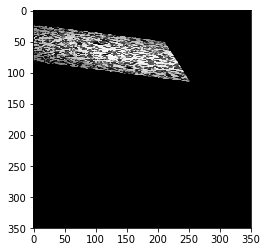

In [7]:
import cv2
from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform

image = cv2.imread("hist-Im097_0.jpg")


tform = AffineTransform(scale=(0.3, 1), rotation=1, shear=0.7, translation=(210, 50))
image = warp(image, tform.inverse, output_shape=(350, 350))


plt.gray()
plt.imshow(image, interpolation='nearest')
plt.show()
